In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def order(number, l_f):
    nmol = 64
    natom = 9
    nframe = 98

    cos2_theta=0
    
    for frame in range(number*98,(number+1)*98):
        a = (((nmol*natom) + 2)*frame) + 2
        b = a + (nmol*natom)
        
        for i in range(a, b, natom):   
            start = i
            end = i + (natom-1)
            
            vx = float(l_f[end].split()[1])-float(l_f[start].split()[1])
            vy = float(l_f[end].split()[2])-float(l_f[start].split()[2])
            vz = float(l_f[end].split()[3])-float(l_f[start].split()[3])
            
            r = (vx**2 + vy**2 + vz**2)**0.5
            cos2_theta = (vy/r)**2 + cos2_theta

    cos2_theta = cos2_theta/(nframe*nmol)
    return ((1.5*cos2_theta) - 0.5)

In [3]:
names = ['Explicit Distance Calculation', 'Decision Tree', 'QDA', 'Naive Bayes', 'Grad Boost']

r_all = []
results_all = []
std_all = []

for name in range(0,5):
    a = []
    b = []
    for run in range(0,10):
        f = open('./' + names[name] + '/prev/for_vmd_normal_' + str(run) + '.xyz','r')
        l_f = f.readlines()

        ra = []
        rb = []
        
        N = 64
        phi = 0.25
        L = (N/phi)**(1/3)

        rho_cp = 0.1309704515597676
        
        temp = (9*(4/3)*3.14*((0.11111111/2)**3))/(rho_cp)

        for i in range(0,100):
            ra.append(order(i, l_f))
            rb.append(64*temp/(L**3))
            L = (64/((64/(L**3)) + 0.075))**(1/3)
        
        ra2 = []
        rb2 = []
        
        for i in range(0,len(ra),5):
            ra2.append(ra[i])
            rb2.append(rb[i])
            
        a.append(ra2)
        b.append(rb2)
    
    std = np.std(a, axis=0)
    results = np.average(a, axis=0)
    r = np.average(b, axis=0)
    
    std_all.append(std)
    results_all.append(results)
    r_all.append(r)
    
    print('Done... ', names[name])
    

Done...  Explicit Distance Calculation
Done...  Decision Tree
Done...  QDA
Done...  Naive Bayes
Done...  Grad Boost


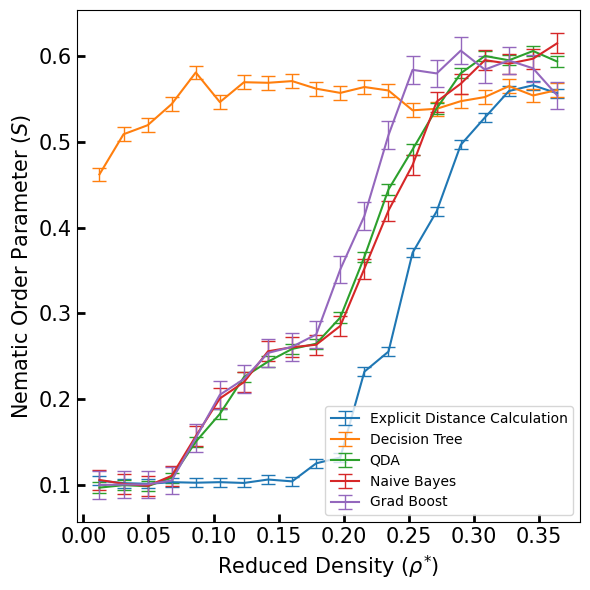

In [9]:
plt.figure(figsize=(6,6))
for i in range(5):                                                                                                        
    plt.errorbar(r_all[i], results_all[i], yerr=std[i], elinewidth=1, capsize=5, label=names[i])

plt.legend(loc=4, fontsize=10)
plt.xlabel(r"Reduced Density $(\rho^{*})$",fontsize=15)
plt.ylabel(r"Nematic Order Parameter $(S)$",fontsize=15)
plt.tick_params(direction='in', length=6, width=2, colors='black', labelsize=15, grid_color='black')

plt.tight_layout()
plt.savefig('Nematic_Order_Parameter_new.png', dpi=200)
plt.show()